<a href="https://colab.research.google.com/github/d4yane/numerical-methods/blob/main/Projeto%5BIII%5DM%C3%A9todos_Num%C3%A9ricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

## 🎓 (UFPB) - Universidade Federal da Paraíba
### **Métodos Numéricos - Atividade Prática - [Projeto III]**

👩‍🏫 Professora: Ana Paula Pintado Wyse

👩🏻‍🎓 Discente: Dayane Freitas Felipe Ramos


```
Mínimos Quadrados Linear
```

O modelo linear que queremos ajustar aos dados tem a forma:

$ y = a \cdot x + b $

Onde $ a $ é a inclinação da linha e $ b $ é a interceptação com o eixo y. O objetivo é encontrar os valores de $ a $ e $ b $ que minimizam a soma dos quadrados das diferenças entre os valores observados de $ y $ e os valores previstos pelo modelo.

Para um conjunto de pontos $(x_i, y_i)$, os estimadores de mínimos quadrados para $ a $ e $ b $ são dados por:

$
a = \frac{N\sum (x_iy_i) - \sum x_i \sum y_i}{N\sum x_i^2 - (\sum x_i)^2}
$

$
b = \frac{\sum y_i - a \sum x_i}{N}
$

Onde $ N $ é o número de pontos de dados.
```
Mínimos Quadrados Quadráticos
```

Para o caso quadrático, queremos ajustar um modelo da forma:
$ y = ax^2 + bx + c $

Aqui, o objetivo é encontrar os coeficientes $ a $, $ b $, e $ c $ que minimizam a soma dos quadrados das diferenças entre os valores observados de $ y $ e os valores previstos pelo modelo.

Os estimadores para $ a $, $ b $, e $ c $ podem ser encontrados resolvendo o seguinte sistema de equações normais:

$
\begin{align*}
a\sum x_i^4 + b\sum x_i^3 + c\sum x_i^2 &= \sum x_i^2y_i \\
a\sum x_i^3 + b\sum x_i^2 + c\sum x_i &= \sum x_iy_i \\
a\sum x_i^2 + b\sum x_i + cN &= \sum y_i
\end{align*}
$

Criei um conjunto de dados sintético para demonstrar o processo de ajuste dos modelos. Em seguida, implementei os cálculos necessários para encontrar os coeficientes de mínimos quadrados linear e quadrático.

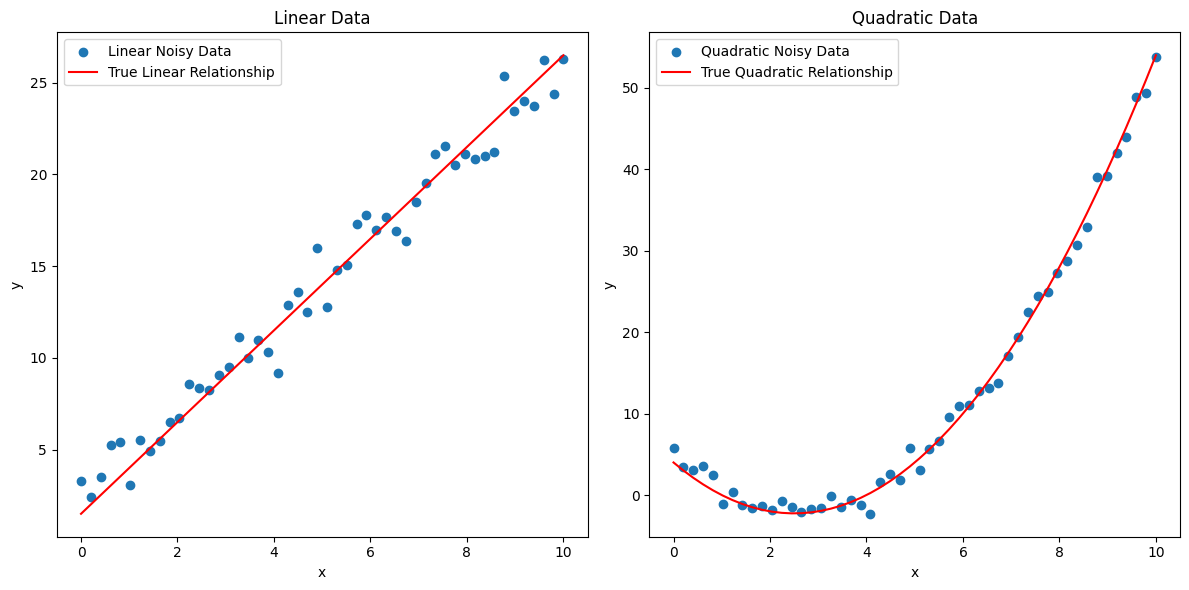

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import *
from scipy.integrate import quad

# Gerar dados sintéticos
np.random.seed(0)  # Para reprodutibilidade
x = np.linspace(0, 10, 50)
y_linear = 2.5 * x + 1.5  # Gerar uma linha reta
y_quadratic = 1.0 * x**2 - 5.0 * x + 4.0  # Gerar uma parábola

# Adicionar algum ruído aos dados
noise = np.random.normal(0, 1, x.shape)
y_linear_noisy = y_linear + noise
y_quadratic_noisy = y_quadratic + noise

# Visualizar os dados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, y_linear_noisy, label='Linear Noisy Data')
plt.plot(x, y_linear, color='r', label='True Linear Relationship')
plt.title('Linear Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x, y_quadratic_noisy, label='Quadratic Noisy Data')
plt.plot(x, y_quadratic, color='r', label='True Quadratic Relationship')
plt.title('Quadratic Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


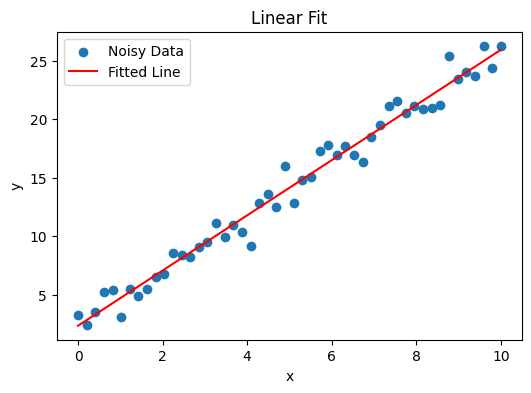

(2.3588377507009826, 2.3463705188081825)

In [ ]:
# Implementação do método dos mínimos quadrados linear

# Calculando os coeficientes a e b para o ajuste linear
N = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y_linear_noisy)
sum_x2 = np.sum(x**2)
sum_xy = np.sum(x*y_linear_noisy)

a_linear = (N*sum_xy - sum_x*sum_y) / (N*sum_x2 - sum_x**2)
b_linear = (sum_y - a_linear*sum_x) / N

# Função para calcular o y previsto
def predict_linear(x, a, b):
    return a * x + b

# Calcular os valores previstos
y_pred_linear = predict_linear(x, a_linear, b_linear)

# Mostrar os resultados
plt.figure(figsize=(6, 4))
plt.scatter(x, y_linear_noisy, label='Noisy Data')
plt.plot(x, y_pred_linear, color='r', label='Fitted Line')
plt.title('Linear Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

(a_linear, b_linear)


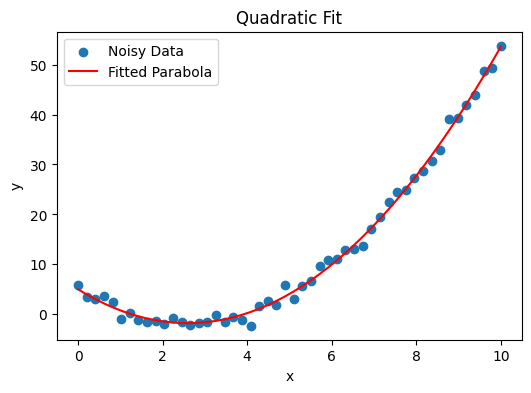

array([ 1.0092181 , -5.23334328,  4.99687015])

In [ ]:
# Implementação do método dos mínimos quadrados quadrático

# Construindo as matrizes para resolver o sistema de equações normais
X_quad = np.column_stack((x**2, x, np.ones(N)))
Y_quad = y_quadratic_noisy

# Resolvendo para os coeficientes a, b, c usando a fórmula matricial
# Coeficientes = (X^T * X)^(-1) * X^T * Y
coef_quad = np.linalg.inv(X_quad.T @ X_quad) @ X_quad.T @ Y_quad

# Função para calcular o y previsto
def predict_quadratic(x, a, b, c):
    return a * x**2 + b * x + c

# Calcular os valores previstos
y_pred_quadratic = predict_quadratic(x, *coef_quad)

# Mostrar os resultados
plt.figure(figsize=(6, 4))
plt.scatter(x, y_quadratic_noisy, label='Noisy Data')
plt.plot(x, y_pred_quadratic, color='r', label='Fitted Parabola')
plt.title('Quadratic Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

coef_quad  # Retorna os coeficientes a, b, c


In [ ]:
import numpy as np

# Definindo as funções para ajuste linear e quadrático de mínimos quadrados
def linear_least_squares(x, y):
    N = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x**2)
    sum_xy = np.sum(x*y)

    a = (N*sum_xy - sum_x*sum_y) / (N*sum_x2 - sum_x**2)
    b = (sum_y - a*sum_x) / N

    # Calculando R^2
    y_pred = a * x + b
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    return {'a': a, 'b': b, 'R^2': r_squared, 'predict': lambda x_new: a * x_new + b}

def quadratic_least_squares(x, y):
    X_quad = np.column_stack((x**2, x, np.ones(len(x))))
    coef_quad = np.linalg.inv(X_quad.T @ X_quad) @ X_quad.T @ y
    a, b, c = coef_quad

    # Calculando R^2
    y_pred = a * x**2 + b * x + c
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    return {'a': a, 'b': b, 'c': c, 'R^2': r_squared, 'predict': lambda x_new: a * x_new**2 + b * x_new + c}

# Testando as funções com dados sintéticos
np.random.seed(0)
x_test = np.linspace(0, 10, 50)
y_linear_test = 2.5 * x_test + 1.5 + np.random.normal(0, 1, x_test.shape)
y_quadratic_test = 1.0 * x_test**2 - 5.0 * x_test + 4.0 + np.random.normal(0, 1, x_test.shape)

# Realizando os ajustes
linear_results = linear_least_squares(x_test, y_linear_test)
quadratic_results

linear_results, quadratic_results


({'a': 2.3588377507009826,
  'b': 2.3463705188081825,
  'R^2': 0.977834337127361,
  'predict': <function __main__.linear_least_squares.<locals>.<lambda>(x_new)>},
 {'a': 1.0152959440085554,
  'b': -5.034560470365265,
  'c': 3.6367916082532705,
  'R^2': 0.9978739061342762,
  'predict': <function __main__.quadratic_least_squares.<locals>.<lambda>(x_new)>})



### Para o ajuste linear:
1. A função aceita arrays de valores de $ x $ e $ y $.
2. Calcula os coeficientes $ a $ (inclinação) e $ b $ (interceptação).
3. Calcula o $ R^2 $ para avaliar o ajuste.

### Para o ajuste quadrático:
1. A função aceita arrays de valores de $ x $ e $ y $.
2. Calcula os coeficientes $ a $, $ b $ e $ c $ do polinômio quadrático.
3. Calcula o $ R^2 $ para avaliar o ajuste.


Para o ajuste linear:
- Coeficiente $ a $ (inclinação): 2.359
- Coeficiente $ b $ (interceptação): 2.346
- Coeficiente de determinação $ R^2 $: 0.978

Para o ajuste quadrático:
- Coeficiente $ a $: 1.015
- Coeficiente $ b $: -5.035
- Coeficiente $ c $: 3.637
- Coeficiente de determinação $ R^2 $: 0.998

O valor de $ R^2 $ próximo de 1 para ambos os modelos indica que eles explicam uma grande proporção da variância dos dados.

Usei a função `predict` dentro de cada resultado pode ser usada para fazer previsões com base nos modelos ajustados.

```
*Método Trapézio Composto*
```

In [ ]:
def trapezoidal_composite_rule(f, a, b, n):
    """
    Calcula a integral de uma função usando a regra do trapézio composto.
    Parâmetros:
    - f: função a ser integrada
    - a: limite inferior de integração
    - b: limite superior de integração
    - n: número de subintervalos (trapezoides)
    Retorna:
    - Valor aproximado da integral
    """
    if n <= 0:
        raise ValueError("O número de passos n deve ser maior que zero.")
    if a >= b:
        raise ValueError("O limite inferior a deve ser menor que o limite superior b.")

    h = (b - a) / n
    integral = 0.5 * f(a) + 0.5 * f(b)  # Inicializa com os primeiros e últimos termos

    # Criação da tabela
    table_header = "i   | xi        | yi        | ti   | yi*ti"
    print(table_header)
    print("-" * len(table_header))

    # Primeira linha (i=0)
    print(f"{0:<4}| {a:<10.6f}| {f(a):<10.6f}| {1:<4}| {f(a):<10.6f}")

    for i in range(1, n):
        xi = a + i * h
        yi = f(xi)
        integral += yi
        print(f"{i:<4}| {xi:<10.6f}| {yi:<10.6f}| {2:<4}| {(yi*2):<10.6f}")

    # Última linha (i=n)
    print(f"{n:<4}| {b:<10.6f}| {f(b):<10.6f}| {1:<4}| {f(b):<10.6f}")

    integral *= h  # Aplica o fator comum h/2 no final
    return integral

# Definição da função a ser integrada e parâmetros
f = lambda x: x ** 2
a = 1.2
b = 2
n = 10
valor_exato = (b ** 3 - a ** 3) / 3  # Valor exato da integral para comparação

# Cálculo da integral
trap_c = trapezoidal_composite_rule(f, a, b, n)
e_abs = abs(valor_exato - trap_c)

# Impressão dos resultados
print("\nTrapézio Composto: y =", trap_c)
print("Trapézio Composto arredondado: y =", round(trap_c))
print("# --- ERRO ABSOLUTO --- #")
print("EA =", e_abs)


i   | xi        | yi        | ti   | yi*ti
------------------------------------------
0   | 1.200000  | 1.440000  | 1   | 1.440000  
1   | 1.280000  | 1.638400  | 2   | 3.276800  
2   | 1.360000  | 1.849600  | 2   | 3.699200  
3   | 1.440000  | 2.073600  | 2   | 4.147200  
4   | 1.520000  | 2.310400  | 2   | 4.620800  
5   | 1.600000  | 2.560000  | 2   | 5.120000  
6   | 1.680000  | 2.822400  | 2   | 5.644800  
7   | 1.760000  | 3.097600  | 2   | 6.195200  
8   | 1.840000  | 3.385600  | 2   | 6.771200  
9   | 1.920000  | 3.686400  | 2   | 7.372800  
10  | 2.000000  | 4.000000  | 1   | 4.000000  

Trapézio Composto: y = 2.09152
Trapézio Composto arredondado: y = 2
# --- ERRO ABSOLUTO --- #
EA = 0.0008533333333331505


```
Simpson 1/3 Composto
```

In [ ]:
def simpson_one_third_composite_rule(f, a, b, n):
    """
    Calcula a integral de uma função usando a regra de Simpson 1/3 composta.

    Parâmetros:
    - f: função a ser integrada
    - a: limite inferior de integração
    - b: limite superior de integração
    - n: número de subintervalos (deve ser par para Simpson)

    Retorna:
    - Valor aproximado da integral
    """
    if n <= 0:
        raise ValueError("O número de passos n deve ser maior que zero.")
    if a >= b:
        raise ValueError("O limite inferior a deve ser menor que o limite superior b.")
    if n % 2 == 1:
        raise ValueError("Para a regra de Simpson, o número de passos n deve ser par.")

    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)

    # Criação da tabela
    table_header = "i   | xi        | yi        | ti   | yi*ti"
    print(table_header)
    print("-" * len(table_header))

    integral = y[0] + y[-1]  # Primeiro e último termos

    # Primeira linha (i=0)
    print(f"{0:<4}| {x[0]:<10.6f}| {y[0]:<10.6f}| {1:<4}| {y[0]:<10.6f}")

    # Calcula os termos intermediários com pesos 4 e 2 alternadamente
    ti_values = [4 if i % 2 != 0 else 2 for i in range(1, n)]
    yi_ti_values = y[1:-1] * ti_values
    integral += sum(yi_ti_values)

    # Imprime a tabela para os termos intermediários
    for i in range(1, n):
        print(f"{i:<4}| {x[i]:<10.6f}| {y[i]:<10.6f}| {ti_values[i-1]:<4}| {yi_ti_values[i-1]:<10.6f}")

    # Última linha (i=n)
    print(f"{n:<4}| {x[-1]:<10.6f}| {y[-1]:<10.6f}| {1:<4}| {y[-1]:<10.6f}")

    integral *= h / 3  # Aplica o fator comum h/3 no final
    return integral

# Cálculo da integral
# Para a regra de Simpson, n precisa ser par. Se n for ímpar, adicionamos 1 para torná-lo par.
n_simpson = n if n % 2 == 0 else n + 1
simpson_c = simpson_one_third_composite_rule(f, a, b, n_simpson)
e_abs_simpson = abs(valor_exato - simpson_c)

# Impressão dos resultados
print("\nSimpson 1/3 Composto: y =", simpson_c)
print("Simpson 1/3 Composto arredondado: y =", round(simpson_c))
print("# --- ERRO ABSOLUTO --- #")
print("EA =", e_abs_simpson)


i   | xi        | yi        | ti   | yi*ti
------------------------------------------
0   | 0.400000  | 0.160000  | 1   | 0.160000  
1   | 0.560000  | 0.313600  | 4   | 1.254400  
2   | 0.720000  | 0.518400  | 2   | 1.036800  
3   | 0.880000  | 0.774400  | 4   | 3.097600  
4   | 1.040000  | 1.081600  | 2   | 2.163200  
5   | 1.200000  | 1.440000  | 4   | 5.760000  
6   | 1.360000  | 1.849600  | 2   | 3.699200  
7   | 1.520000  | 2.310400  | 4   | 9.241600  
8   | 1.680000  | 2.822400  | 2   | 5.644800  
9   | 1.840000  | 3.385600  | 4   | 13.542400 
10  | 2.000000  | 4.000000  | 1   | 4.000000  

Simpson 1/3 Composto: y = 2.6453333333333333
Simpson 1/3 Composto arredondado: y = 3
# --- ERRO ABSOLUTO --- #
EA = 0.0


```
Método Simpson 3/8
```

In [ ]:
def f(x):
    return 1 / (1 + x**2)

def simpson38(x0, xn, n):
    h = (xn - x0) / n
    integration = f(x0) + f(xn)

    for i in range(1, n):
        k = x0 + i * h
        weight = 2 if i % 3 == 0 else 3
        integration += weight * f(k)

    return (3 * h / 8) * integration

def main():
    lower_limit = float(input("Insira o limite inferior de integração: "))
    upper_limit = float(input("Insira o limite superior de integração: "))
    sub_interval = int(input("Insira o número de subintervalos: "))

    if sub_interval % 3 != 0:
        print("O número de subintervalos deve ser um múltiplo de 3.")
        return

    result = simpson38(lower_limit, upper_limit, sub_interval)
    print("O resultado da integração pelo método 3/8 de Simpson é:% 0.6f" % result)

if __name__ == "__main__":
    main()


Insira o limite inferior de integração: -5
Insira o limite superior de integração: 3
Insira o número de subintervalos: 6
O resultado da integração pelo método 3/8 de Simpson é: 2.652894
